In [7]:
from keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
#原始模型， 16 個單元
from keras import models
from keras import layers
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))
original_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from keras import regularizers
l2_model = models.Sequential()
#加入 L2 權重常規化並將學習率設為 0.001
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                            activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                            activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
original_hist = original_model.fit(x_train, y_train,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(x_test, y_test))

# 編譯模型
l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])
 #  開始訓練模型
l2_model_hist = l2_model.fit(x_train, y_train,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - acc: 0.7348 - loss: 0.5712 - val_acc: 0.8760 - val_loss: 0.3589
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9019 - loss: 0.2960 - val_acc: 0.8873 - val_loss: 0.2907
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9197 - loss: 0.2257 - val_acc: 0.8894 - val_loss: 0.2768
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9343 - loss: 0.1873 - val_acc: 0.8873 - val_loss: 0.2814
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9459 - loss: 0.1582 - val_acc: 0.8843 - val_loss: 0.2913
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9501 - loss: 0.1437 - val_acc: 0.8822 - val_loss: 0.3045
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9583 - loss: 0.1242 - val_acc: 0.8770 - val_loss: 0.3274
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9613 - loss: 0.1168 - val_acc: 0.8747 - val_loss: 0.3447
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9674 - loss

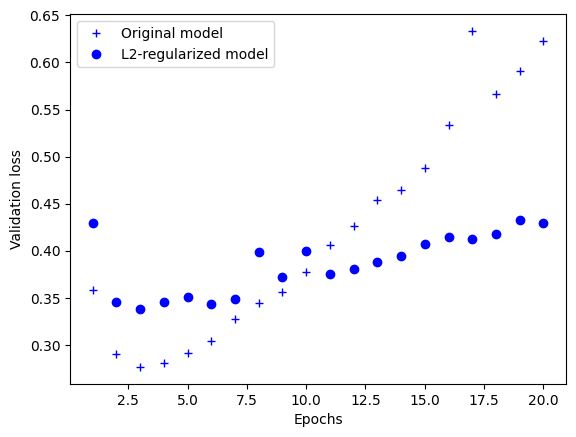

In [11]:
import matplotlib.pyplot as plt
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
l2_model_val_loss = l2_model_hist.history['val_loss']
plt.plot(epochs, original_val_loss, 'b+',
            label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo',
            label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()